In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")


In [2]:
# Load the datasets
customers = pd.read_csv('Customer.csv')
transactions = pd.read_csv('Transactions.csv')
product_hierarchy = pd.read_csv('prod_cat_info.csv')


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.


In [3]:
# Merging the datasets: Customers, Product Hierarchy, and Transactions
customer_final = pd.merge(transactions, customers, left_on='cust_id', right_on='customer_Id', how='inner')
customer_final = pd.merge(customer_final, product_hierarchy, left_on=['prod_cat_code', 'prod_subcat_code'],
                          right_on=['prod_cat_code', 'prod_sub_cat_code'], how='inner')


2. Prepare a summary report for the merged data set.
 a. Get the column names and their corresponding data types


In [4]:
# Display the columns and their data types
print(customer_final.dtypes)

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


 b. Top/Bottom 10 observations

In [5]:
# Display the top 10 observations
print(customer_final.head(10))

# Display the bottom 10 observations
print(customer_final.tail(10))


   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  20-02-2014                 1              1    5   
2     18505840838   271509  16-12-2013                 1              1    3   
3     92814475704   267750  16-08-2013                 1              1   -4   
4     92814475704   267750    7/8/2013                 1              1    4   
5      4737317330   269345  29-07-2011                 1              1    5   
6     44425889101   274987  18-03-2012                 1              1    4   
7     90501340928   271817  19-02-2012                 1              1    1   
8     99335419136   268755  13-12-2012                 1              1    3   
9     35030444164   268129  18-11-2011                 1              1    5   

   Rate      Tax  total_amt      Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -4265.300          e-S

 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max

In [6]:
# Summary statistics for continuous variables
print(customer_final.describe())


       transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
count    2.305300e+04   23053.000000      23053.000000   23053.000000   
mean     5.007348e+10  271021.746497          6.149091       3.763632   
std      2.898194e+10    2431.692059          3.726372       1.677016   
min      3.268991e+06  266783.000000          1.000000       1.000000   
25%      2.493864e+10  268935.000000          3.000000       2.000000   
50%      5.009313e+10  270980.000000          5.000000       4.000000   
75%      7.533000e+10  273114.000000         10.000000       5.000000   
max      9.998755e+10  275265.000000         12.000000       6.000000   

                Qty          Rate           Tax     total_amt    customer_Id  \
count  23053.000000  23053.000000  23053.000000  23053.000000   23053.000000   
mean       2.432395    636.369713    248.667192   2107.308002  271021.746497   
std        2.268406    622.363498    187.177773   2507.561264    2431.692059   
min       -5.000000  -

d. Frequency tables for all the categorical variables

In [7]:
# Frequency table for all categorical variables
categorical_columns = customer_final.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f'Frequency of {column}:')
    print(customer_final[column].value_counts())
    print('\n')


Frequency of tran_date:
tran_date
13-07-2011    35
22-11-2011    33
25-09-2011    33
21-12-2013    33
23-10-2011    33
              ..
24-02-2014     2
23-02-2014     2
27-02-2014     1
21-02-2014     1
28-02-2014     1
Name: count, Length: 1129, dtype: int64


Frequency of Store_type:
Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64


Frequency of DOB:
DOB
27-12-1988    32
17-09-1982    32
25-02-1974    27
20-03-1972    25
09-06-1970    24
              ..
03-09-1979     1
28-02-1990     1
12-01-1982     1
11-11-1975     1
14-12-1988     1
Name: count, Length: 3987, dtype: int64


Frequency of Gender:
Gender
M    11811
F    11233
Name: count, dtype: int64


Frequency of prod_cat:
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64


Frequency of prod_subcat:
prod_subcat
Wome

3. Generate histograms for all continuous variables and frequency bars for categorical variables.

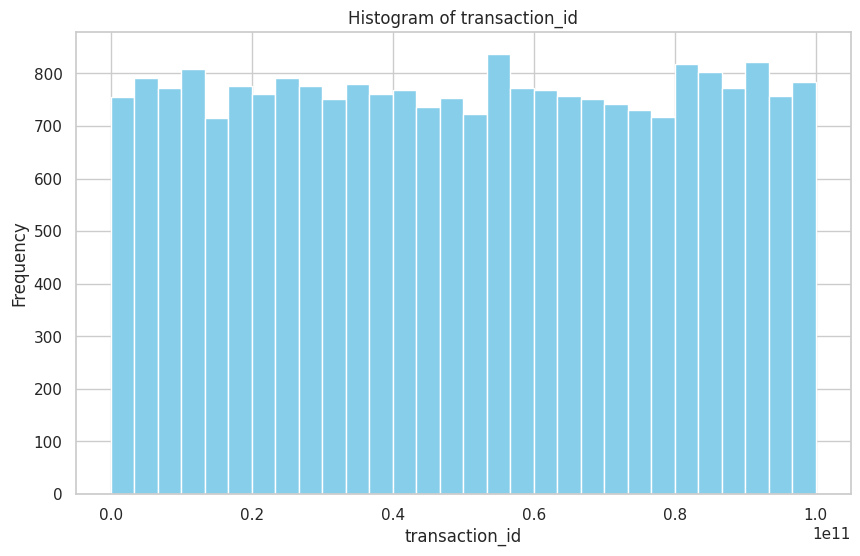

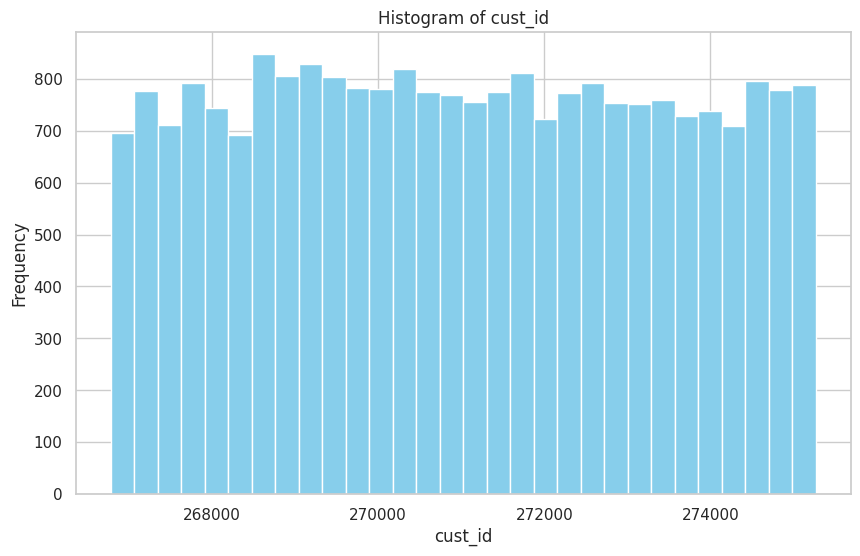

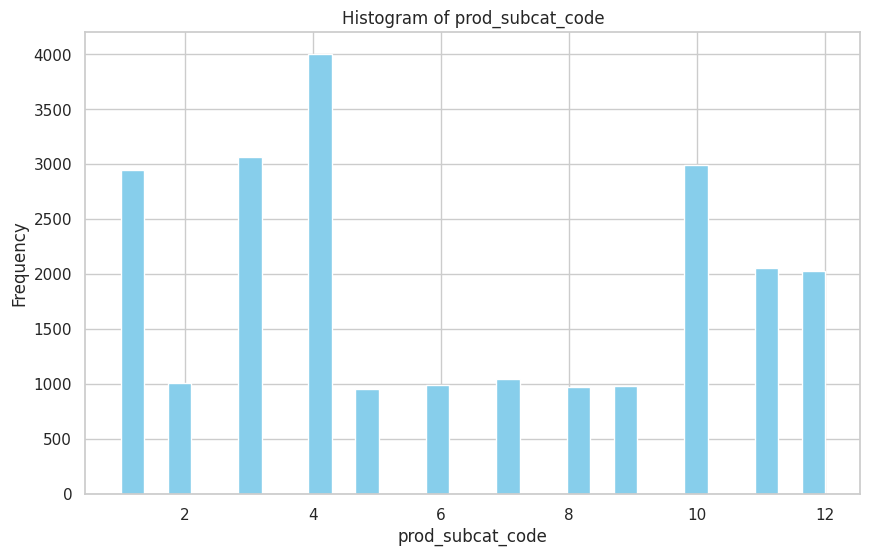

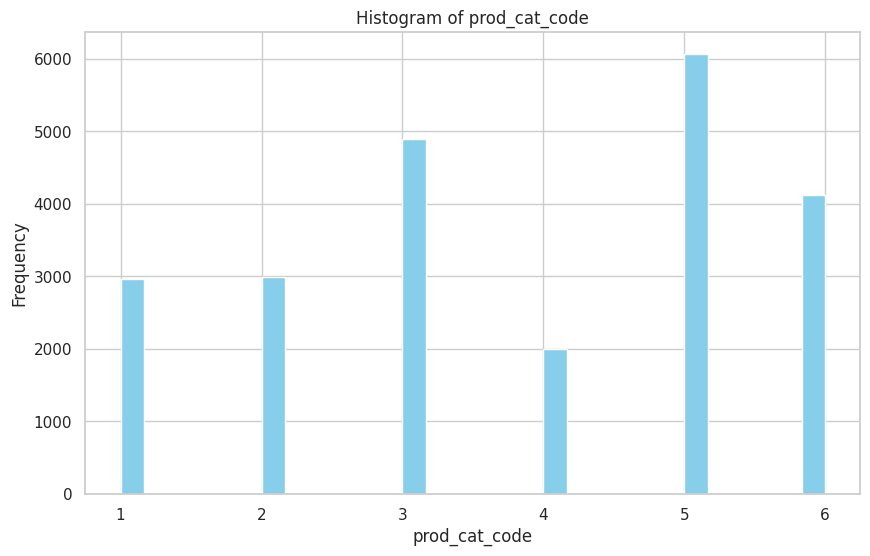

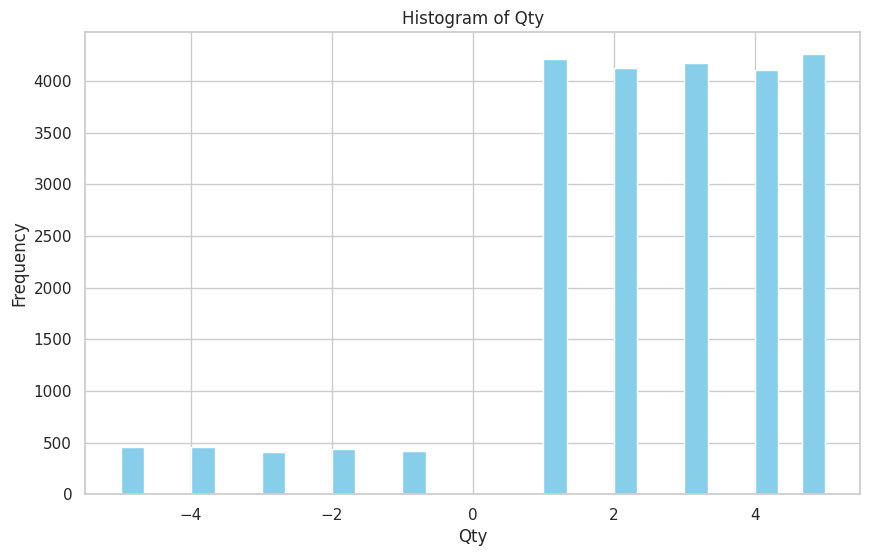

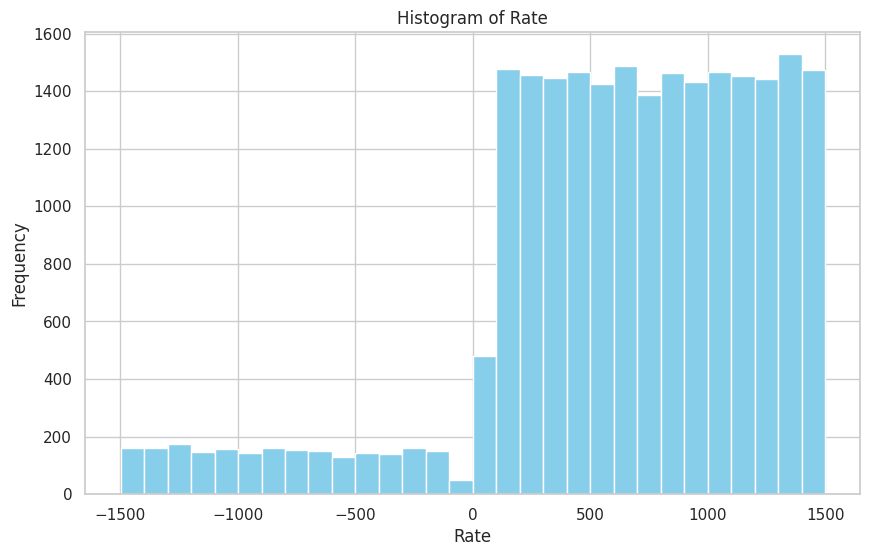

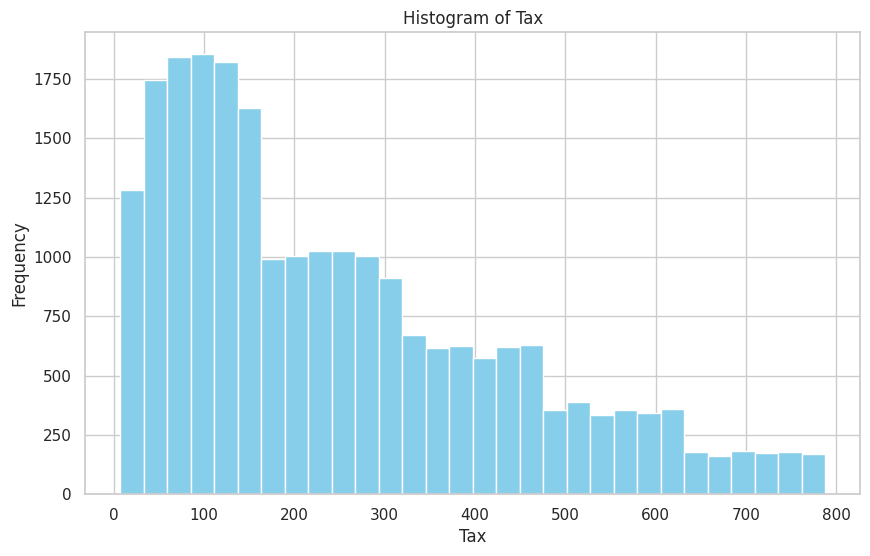

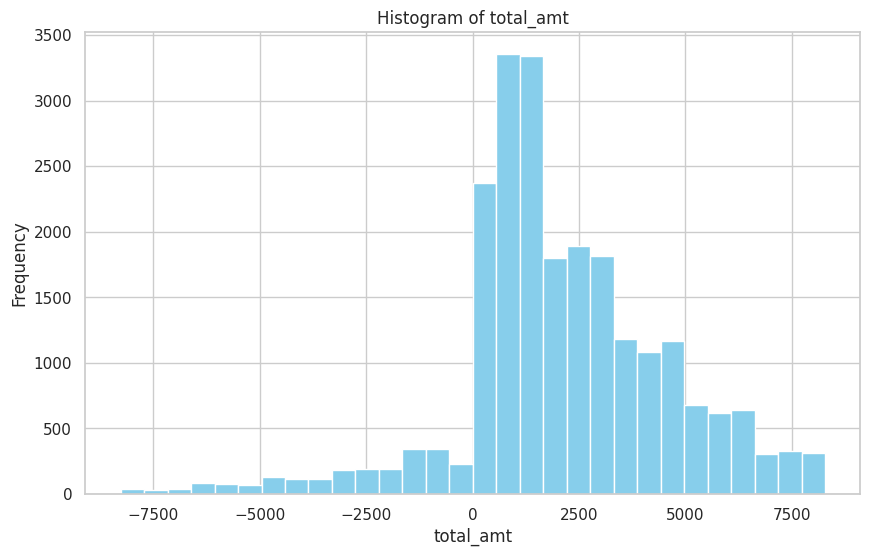

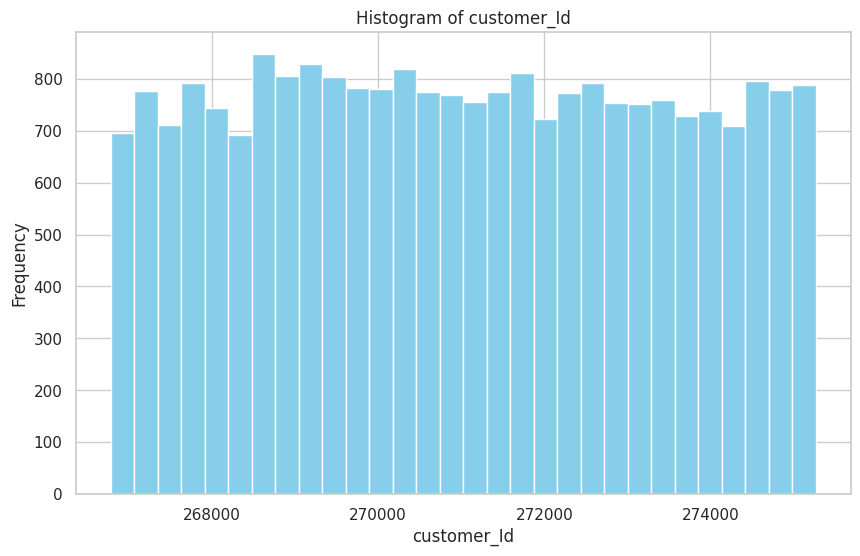

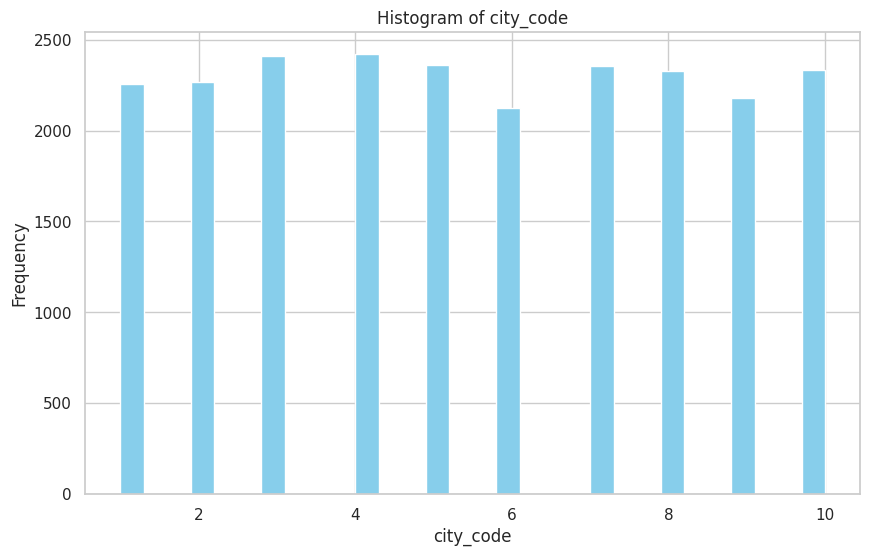

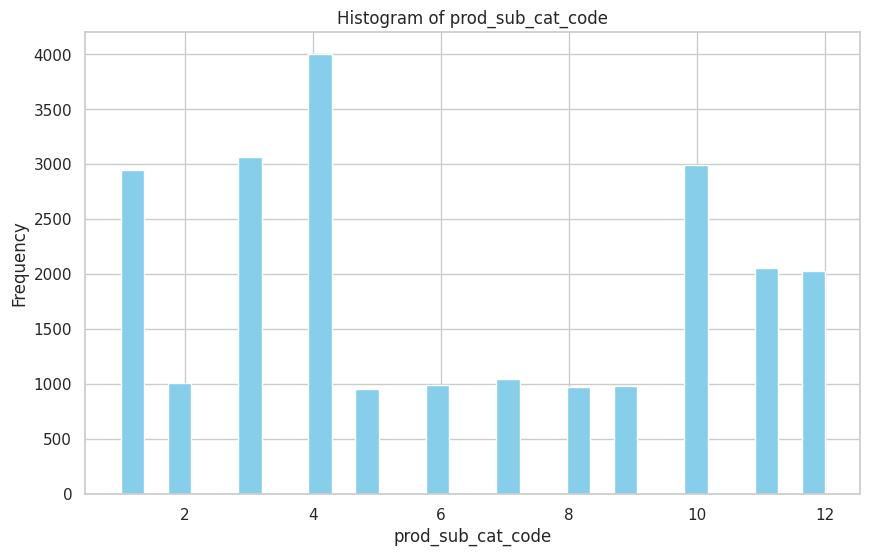

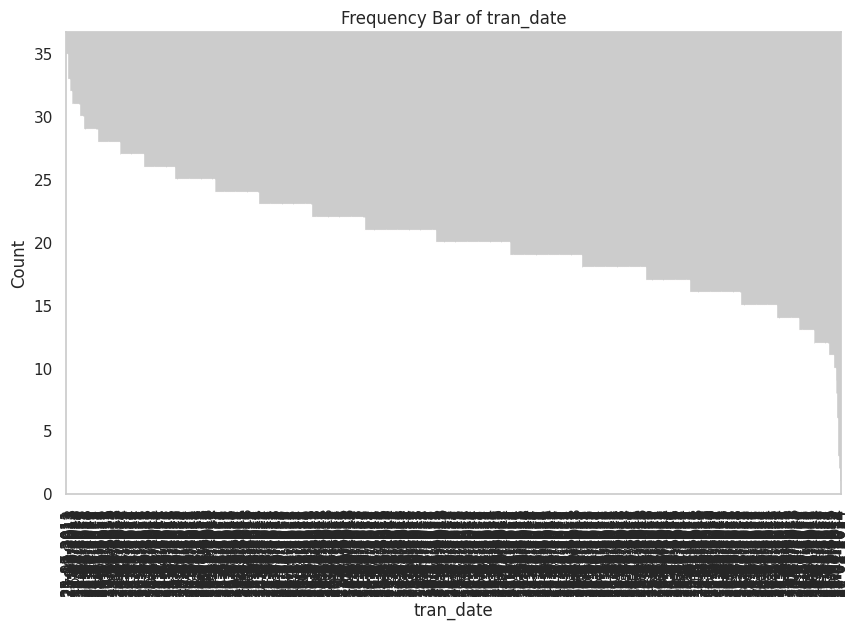

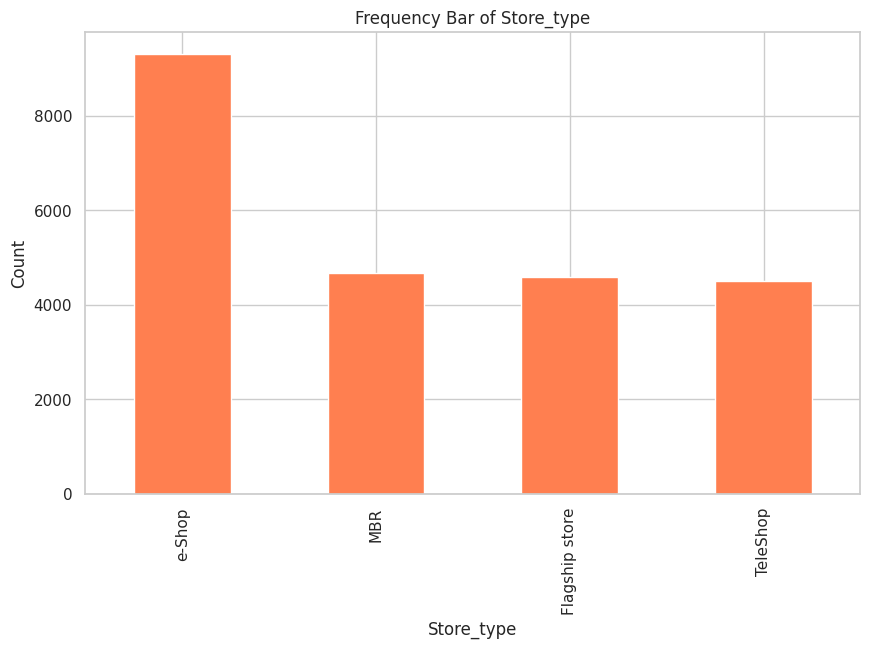

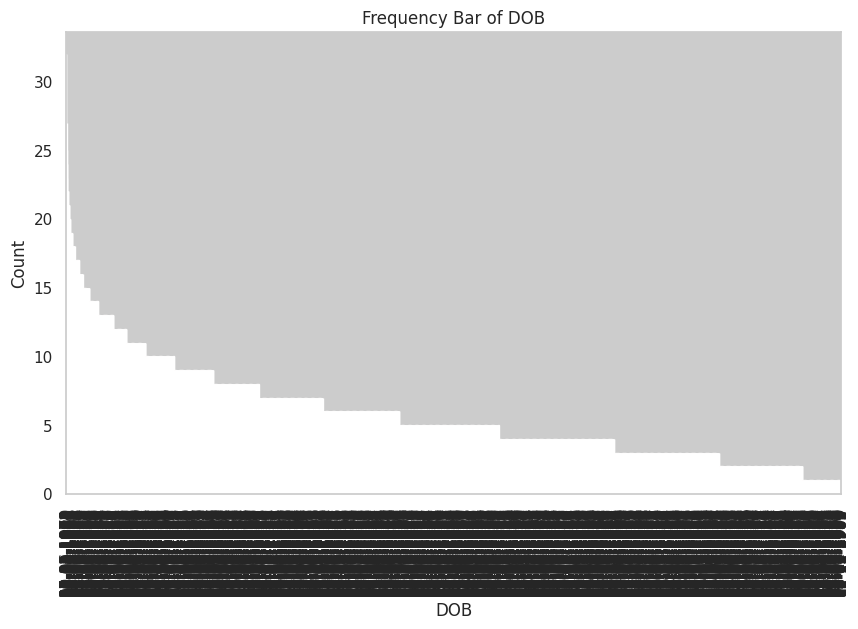

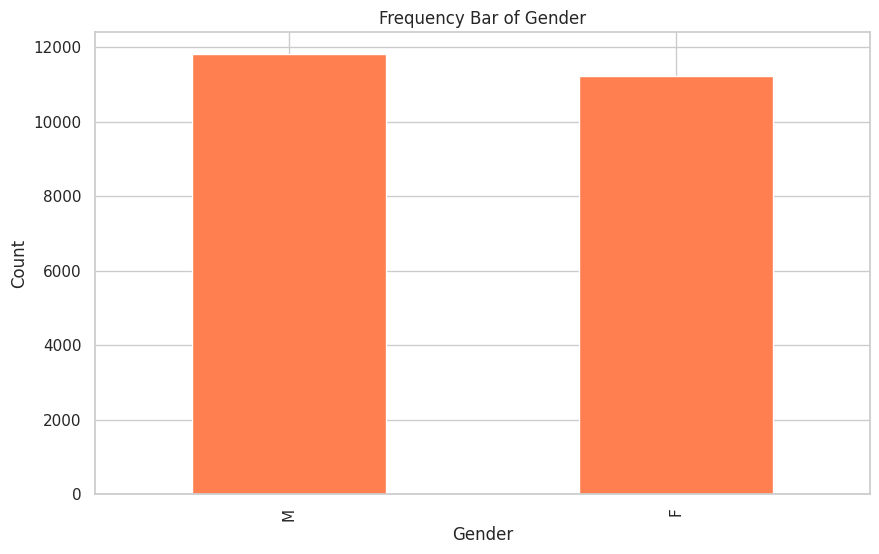

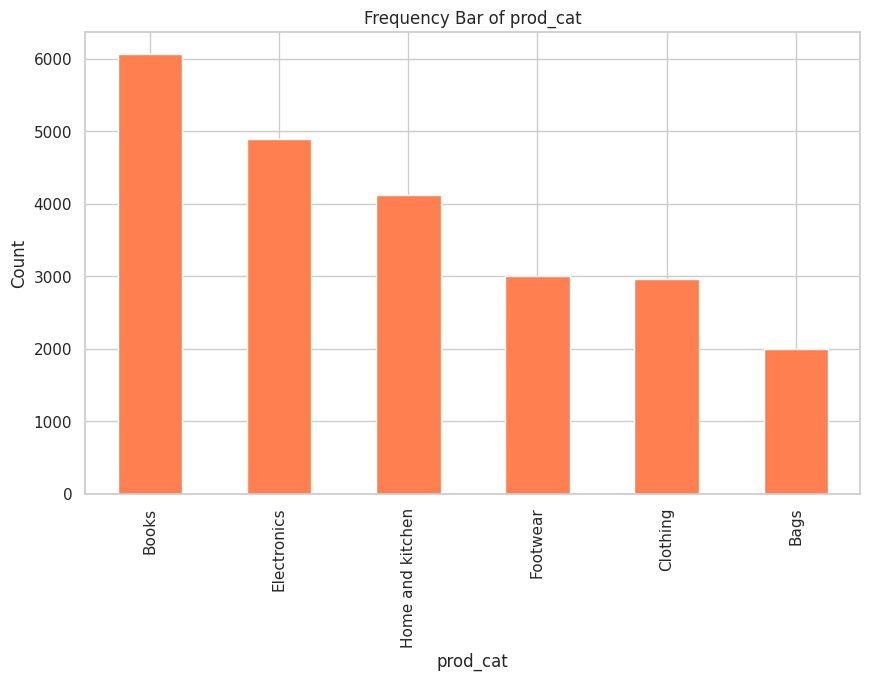

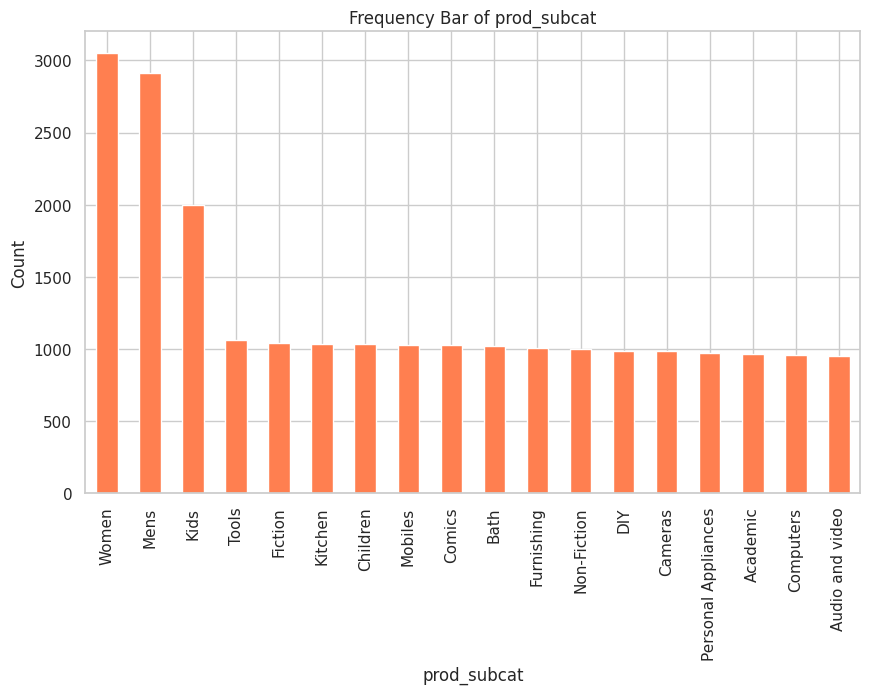

In [8]:
# Histograms for continuous variables
continuous_columns = customer_final.select_dtypes(include=[np.number]).columns
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(customer_final[column].dropna(), bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Frequency bars for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    customer_final[column].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Frequency Bar of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data

In [12]:
# Convert the 'tran_date' to datetime format
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], errors='coerce')

# Find the time period of the transaction data
start_date = customer_final['tran_date'].min()
end_date = customer_final['tran_date'].max()

print(f'Time period of transactions: {start_date} to {end_date}')


Time period of transactions: 2011-01-25 00:00:00 to 2014-02-28 00:00:00


<ipython-input-12-04df8317c12e>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], errors='coerce')


 b. Count of transactions where the total amount of transaction was negative

In [13]:
# Count transactions with negative total amount
negative_transactions = customer_final[customer_final['total_amt'] < 0].shape[0]
print(f'Number of transactions with negative total amount: {negative_transactions}')


Number of transactions with negative total amount: 2177


5. Analyze which product categories are more popular among females vs male customers.


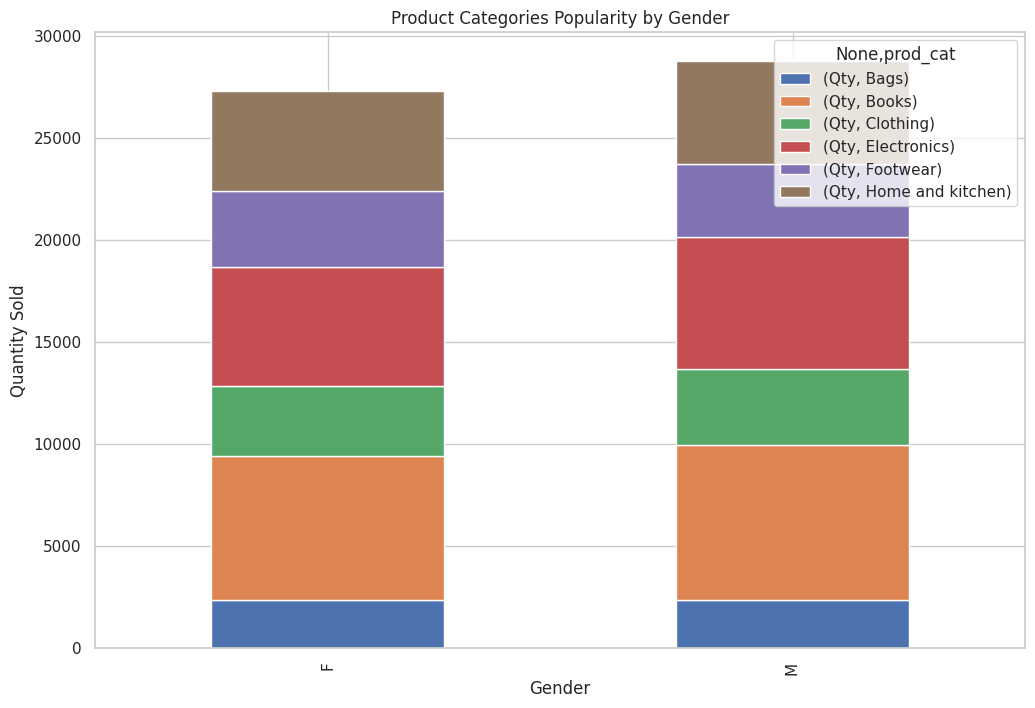

In [14]:
# Grouping by gender and product category
product_gender_analysis = customer_final.groupby(['Gender', 'prod_cat']).agg({'Qty': 'sum'}).unstack()
product_gender_analysis.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Product Categories Popularity by Gender')
plt.xlabel('Gender')
plt.ylabel('Quantity Sold')
plt.show()


6. Which City code has the maximum customers and what was the percentage of customers from
that city?


In [15]:
# Finding the city with the maximum customers
city_code_max_customers = customer_final['city_code'].value_counts().idxmax()
city_code_max_percentage = (customer_final['city_code'].value_counts().max() / len(customer_final)) * 100

print(f'City code with the maximum customers: {city_code_max_customers}')
print(f'Percentage of customers from that city: {city_code_max_percentage:.2f}%')


City code with the maximum customers: 4.0
Percentage of customers from that city: 10.51%


7. Which store type sells the maximum products by value and by quantity?


In [16]:
# Group by store type and calculate total sales by value and quantity
store_sales = customer_final.groupby('Store_type').agg({'Qty': 'sum', 'total_amt': 'sum'})
print(store_sales)


                  Qty     total_amt
Store_type                         
Flagship store  11133  9.715688e+06
MBR             11194  9.674486e+06
TeleShop        10984  9.364781e+06
e-Shop          22763  1.982482e+07


8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?


In [17]:
# Filter data for Flagship Stores and required categories
flagship_sales = customer_final[(customer_final['Store_type'] == 'Flagship store') &
                                (customer_final['prod_cat'].isin(['Electronics', 'Clothing']))]

# Calculate the total amount earned
total_earnings = flagship_sales.groupby('prod_cat')['total_amt'].sum()
print(total_earnings)


prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64


In [1]:
1194423.23 + 2215136.04

3409559.27

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [18]:
# Filter data for Male customers in Electronics category
male_electronics_sales = customer_final[(customer_final['Gender'] == 'M') &
                                        (customer_final['prod_cat'] == 'Electronics')]

# Calculate the total amount earned
total_male_electronics_earnings = male_electronics_sales['total_amt'].sum()
print(f'Total amount earned from Male customers in Electronics category: {total_male_electronics_earnings}')


Total amount earned from Male customers in Electronics category: 5703109.425000001


10. How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?


In [19]:
# Remove transactions with negative amounts
valid_transactions = customer_final[customer_final['total_amt'] >= 0]

# Count unique transactions per customer
unique_transactions = valid_transactions.groupby('cust_id')['transaction_id'].nunique()

# Customers with more than 10 unique transactions
customers_over_10_transactions = unique_transactions[unique_transactions > 10].count()
print(f'Number of customers with more than 10 unique transactions: {customers_over_10_transactions}')


Number of customers with more than 10 unique transactions: 6


11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?


In [20]:
# Calculate the age of customers
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])
current_year = pd.to_datetime('today').year
customer_final['age'] = current_year - customer_final['DOB'].dt.year

# Filter for customers aged 25-35
age_filtered_customers = customer_final[(customer_final['age'] >= 25) & (customer_final['age'] <= 35)]

# a. Total amount spent on Electronics and Books
category_spend = age_filtered_customers[age_filtered_customers['prod_cat'].isin(['Electronics', 'Books'])]
total_spend_by_category = category_spend.groupby('prod_cat')['total_amt'].sum()
print(total_spend_by_category)



prod_cat
Books          2109168.750
Electronics    1819301.835
Name: total_amt, dtype: float64
Total amount spent by customers aged 25-35 between 1st Jan, 2014 and 1st Mar, 2014: 236155.075


<ipython-input-20-958b409d9c81>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])


In [2]:
2109168.750 +   1819301.835

3928470.585

 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [21]:

# b. Total amount spent between 1st Jan, 2014 to 1st Mar, 2014
date_filtered_spend = age_filtered_customers[(age_filtered_customers['tran_date'] >= '2014-01-01') &
                                             (age_filtered_customers['tran_date'] <= '2014-03-01')]
total_spend_date_filtered = date_filtered_spend['total_amt'].sum()
print(f'Total amount spent by customers aged 25-35 between 1st Jan, 2014 and 1st Mar, 2014: {total_spend_date_filtered}')

Total amount spent by customers aged 25-35 between 1st Jan, 2014 and 1st Mar, 2014: 236155.075
